In [1]:
import math 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

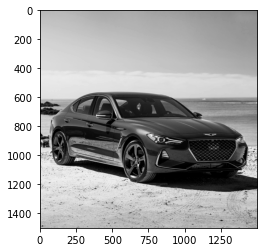

In [13]:
img_carro = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_carro, cmap="gray")

## DERIVADA EN X 

In [43]:
drx = derivadaX(img_carro)
cv2.imwrite("01 DerivadaX.jpg", drx)

True

In [23]:
def derivadaX(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    DerivadaX = np.zeros((alto, ancho, 1))
    
    kernel = np.array([[1/16., 2/16., 1/16.],[2/16., 4/16., 2/16.],[1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel)
    
    for i in range(0, alto):
        for j in range(0, ancho - 1):
            derX = img[i, j+1] - img[i, j]
            DerivadaX[i, j] = derX
    
    return DerivadaX

## Derivada en Y

In [42]:
dry = derivadaY(img_carro)
cv2.imwrite("02 DerivadaY.jpg", dry)

True

In [27]:
def derivadaY(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    DerivadaY = np.zeros((alto, ancho, 1))
    
    kernel = np.array([[1/16., 2/16., 1/16.],[2/16., 4/16., 2/16.],[1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel)
    
    for i in range(0, alto-1):
        for j in range(0, ancho):
            derY = img[i+1, j] - img[i, j]
            DerivadaY[i, j] = derY
    
    return DerivadaY

## MAGNITUD

In [41]:
magImg = magnitud(drx,dry)
cv2.imwrite("03 magnitud.jpg", magImg)

True

In [34]:
def magnitud(dx, dy):
    alto = dx.shape[0]
    ancho = dx.shape[1]
    
    magnitud = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto):
        for j in range(0, ancho):
            mag = math.sqrt(dx[i,j]**2 + dy[i,j]**2)
            magnitud[i,j] = mag 
    return magnitud

## FASE 

In [40]:
faseImg = fase(drx,dry)
cv2.imwrite("04 fase.jpg", faseImg)

True

In [35]:
def fase(dx, dy):
    alto = dx.shape[0]
    ancho = dx.shape[1]
    
    fase = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto):
        for j in range(0, ancho):
            angulo = int((180/math.pi)*math.atan2(dy[i,j],dx[i,j]))
            fase[i,j] = angulo
    return fase 

In [36]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])
    
    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)
    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    return newImg

## Non Max Supression

In [39]:
nmsImg = non_maximum_suppression(magImg, faseImg)
cv2.imwrite("05 nms.jpg", nmsImg)

True

In [38]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho = magImage.shape[1]
    
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            
            if(((angulo > 337) or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2
                #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                #newImg[i, j] = 255
            else:
                newImg[i, j] = 0
    return newImg

## Threshold (Canny)

In [45]:
cannyImg = threshold(nmsImg, 12)
cv2.imwrite("06 canny.jpg", cannyImg)

True

In [44]:
def threshold(img, th):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto): 
        for j in range(0, ancho):
            if(img[i,j] > th):
                newImg[i,j] = 255
            else: 
                newImg[i,j] = 0
                
    return newImg

## Comparación CV2 

In [47]:
edges = cv2.Canny(img_carro, 100, 200)
cv2.imwrite("07 compracion.jpg", edges)

True

In [25]:
def test(img): 
    #h,w = img.shape
    #dx_image = img[:,1:w-1] - img[:,0:w-2]
    
    dx_image = np.diff(img, axis=1)
    plt.imshow(dx_image)
    return dx_image